Association rules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Numero di regole in funzione di supp e conf

## numero di regole per supp=20

In [2]:
supp=20
conf_range=np.arange(50,105,5)
Nrules_supp20 = []
for i,conf in enumerate(conf_range):
    df=pd.read_csv("../../data/rules/rules_supp{}_conf{}.csv".format(supp,conf))
    df=df.query('Lift>1')
    Nrules_supp20.append(df.shape[0])
Nrules_supp20


[122, 99, 85, 81, 69, 69, 61, 53, 37, 31, 8]

In [3]:
## numero di regole per supp=10

In [4]:
supp=10
conf_range=np.arange(50,105,5)
Nrules_supp10 = []
for i,conf in enumerate(conf_range):
    df=pd.read_csv("../../data/rules/rules_supp{}_conf{}.csv".format(supp,conf))
    df=df.query('Lift>1')
    Nrules_supp10.append(df.shape[0])
Nrules_supp10


[914, 781, 695, 656, 584, 579, 542, 508, 411, 337, 63]

In [5]:
## numero di regole per supp=5

In [6]:
supp=5
conf_range=np.arange(50,105,5)
Nrules_supp5 = []
for i,conf in enumerate(conf_range):
    df=pd.read_csv("../../data/rules/rules_supp{}_conf{}.csv".format(supp,conf))
    df=df.query('Lift>1')
    Nrules_supp5.append(df.shape[0])
Nrules_supp5


[4457, 3984, 3594, 3236, 3029, 2955, 2819, 2572, 2261, 1881, 261]

# Grafico numero di regole (Lift>1)

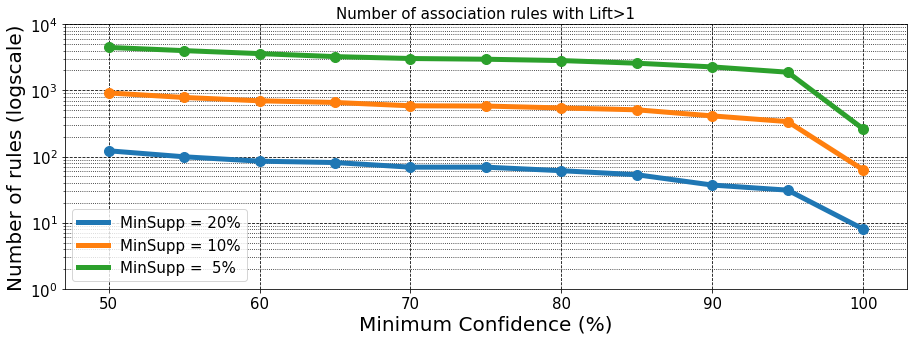

In [7]:
###########################################################
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y label
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', axisbelow=True)
###########################################################

fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(111)
plt.plot(conf_range,Nrules_supp20, label='MinSupp = 20%', linewidth=5)
plt.plot(conf_range,Nrules_supp10, label='MinSupp = 10%', linewidth=5)
plt.plot(conf_range,Nrules_supp5, label='MinSupp =  5%', linewidth=5)
plt.scatter(conf_range,Nrules_supp20,s=100)
plt.scatter(conf_range,Nrules_supp10,s=100)
plt.scatter(conf_range,Nrules_supp5,s=100)

plt.legend()

ax.set_yscale('log')

plt.xlabel('Minimum Confidence (%)')
plt.ylabel('Number of rules (logscale)')

plt.ylim(1,10000)

plt.grid(b=True, which='major', color='0', linestyle='--')
plt.grid(b=True, which='minor', color='0', linestyle=':')

plt.title("Number of association rules with Lift>1")
plt.tight_layout()

plt.savefig("../../images/rules/andamentonumero.pdf")


In [8]:
###########################################################

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y label
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', axisbelow=True)
###########################################################

In [9]:
# regole generali

In [10]:
df = pd.read_csv("../../data/rules/rules_supp20_conf50.csv")
df.shape
#df_filtered = df.query('Supp>0.2') # perchè non è maggiore di 20???
#df_filtered = df_filtered.query('Lift>1')
df_filtered=df
df_filtered.describe()

             Supp        Conf        Lift
count  259.000000  259.000000  259.000000
mean     0.289807    0.826911    1.112896
std      0.102271    0.154743    0.271226
min      0.200000    0.500000    0.880000
25%      0.220000    0.730000    0.990000
50%      0.260000    0.850000    1.000000
75%      0.320000    0.980000    1.125000
max      0.840000    1.000000    2.100000

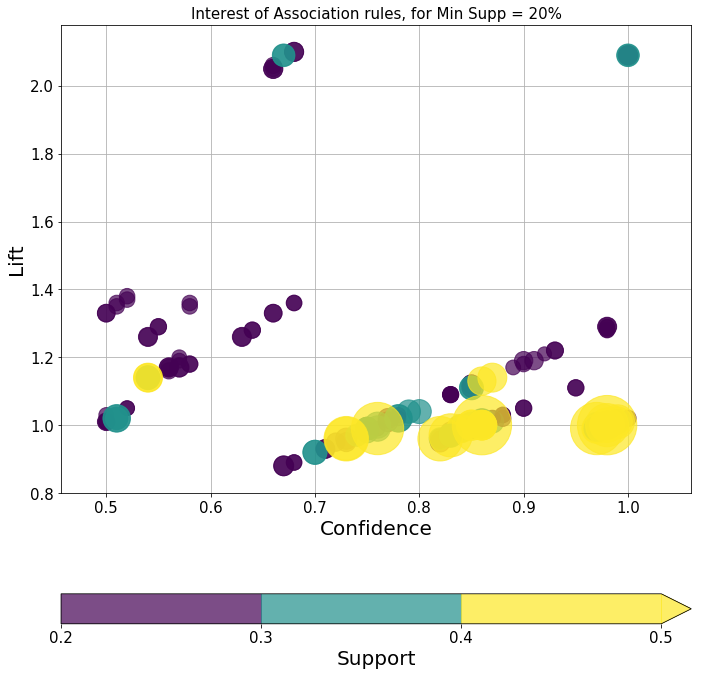

In [11]:

fig = plt.figure(figsize=(10,10))
plt.grid()
size= 5000*(df_filtered.Supp)**(2)
palette='Accent'
palette='viridis'
plt.scatter(x='Conf', y='Lift',data=df_filtered,s=size, alpha=0.7 ,c='Supp',cmap =plt.cm.get_cmap(palette,3))
cb = plt.colorbar(orientation='horizontal',extend='max',ticks=np.arange(0.20,0.70,0.10))
cb.set_label('Support')

#plt.colorbar(extend='both')
plt.clim(0.2,0.5)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title("Interest of Association rules, for Min Supp = 20%")
#plt.legend()
plt.tight_layout()

plt.savefig("../../images/rules/rules_supp20.pdf")

In [14]:
df_interesting = df_filtered.query(" Lift  > 1.5")
df_interesting = df_interesting.sort_values(by=['Conf','Consequent','Supp'],ascending=False)

import sys
stdout= sys.stdout
sys.stdout = open('../../data/rules/rules_supp20.txt','w')
print( df_interesting.to_latex(index=False) )
#print( df[100:300].to_latex(index=False) )
sys.stdout=stdout

#df.query(" Conf<0.7 & Lift >1.8")[0:1].to_latex(index_names=False) 

##?df.to_latex()
df_interesting

      Consequent                              Antecedent  Supp  Conf  Lift
78       high_SL                       ('very good_LE',)  0.32  1.00  2.09
76       high_SL                 ('very good_LE', 'N_P')  0.31  1.00  2.09
63       high_SL          ('very good_LE', 'N_L', 'N_P')  0.27  1.00  2.09
66       high_SL                 ('very good_LE', 'N_L')  0.27  1.00  2.09
70       high_SL         ('very good_LE', 'N_WA', 'N_P')  0.27  1.00  2.09
73       high_SL                ('very good_LE', 'N_WA')  0.27  1.00  2.09
59       high_SL         ('very good_LE', 'N_L', 'N_WA')  0.23  1.00  2.09
55       high_SL  ('very good_LE', 'N_L', 'N_WA', 'N_P')  0.22  1.00  2.09
71  very good_LE              ('high_SL', 'N_WA', 'N_P')  0.27  0.68  2.10
74  very good_LE                     ('high_SL', 'N_WA')  0.27  0.68  2.10
79  very good_LE                            ('high_SL',)  0.32  0.67  2.09
77  very good_LE                      ('high_SL', 'N_P')  0.31  0.67  2.09
64  very good_LE         

In [14]:
# Regole per supp=5

In [22]:


df = pd.read_csv("../../data/rules/rules_supp5_conf50.csv")
df.shape
#df_filtered = df.query('Supp>0.2') # perchè non è maggiore di 20???
#df_filtered = df_filtered.query('Lift>1')
df_filtered=df
df_filtered.describe()


              Supp         Conf         Lift
count  5862.000000  5862.000000  5862.000000
mean      0.088763     0.835553     1.658640
std       0.056477     0.164999     1.118199
min       0.050000     0.500000     0.660000
25%       0.060000     0.690000     1.010000
50%       0.070000     0.880000     1.140000
75%       0.100000     0.980000     2.030000
max       0.840000     1.000000     7.170000

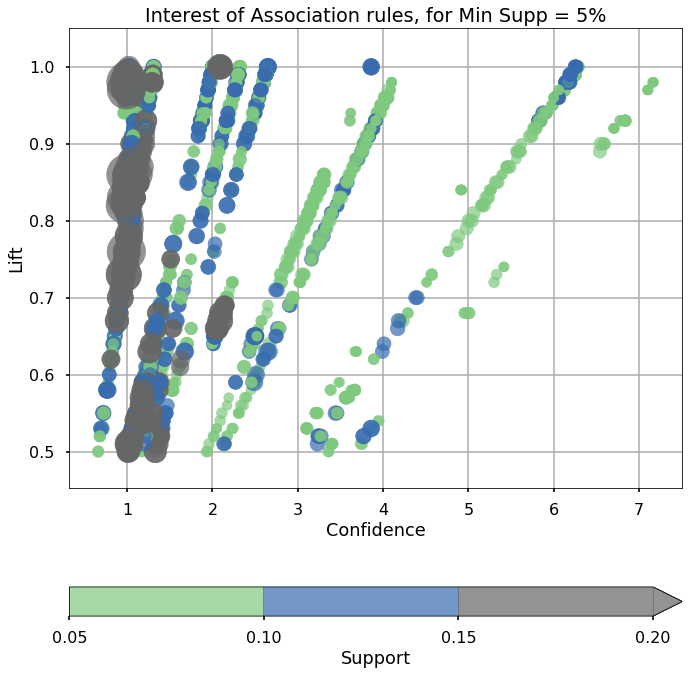

In [23]:
plt.close()
fig = plt.figure(figsize=(10,10))
plt.grid()
size= 2000*(df_filtered.Supp)**(1)
plt.scatter(x='Lift', y='Conf',data=df_filtered,s=size, alpha=0.7 ,c='Supp',cmap =plt.cm.get_cmap('Accent',3))

plt.clim(0.05,0.2)
cb = plt.colorbar(extend='max',orientation='horizontal',ticks=np.arange(0.05,0.70,0.05))
cb.set_label('Support')


plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title("Interest of Association rules, for Min Supp = 5%")
#plt.legend()
plt.tight_layout()

plt.savefig("../../images/rules/rules_supp5.pdf")

In [24]:
import seaborn as sns
sns.set_context("poster")
df_filtered.head()

  Consequent       Antecedent  Supp  Conf  Lift
0        N_P         ('7_D',)  0.05  0.98  1.00
1        N_P         ('6_D',)  0.05  0.97  0.99
2        N_P         ('5_D',)  0.05  0.95  0.97
3        N_P  ('4_D', 'N_WA')  0.05  1.00  1.02
4       N_WA   ('4_D', 'N_P')  0.05  0.85  1.00

In [39]:
#conf_min=0.6
df_plot = df_filtered.query("Lift>0.2 and Conf> 0.6 and Supp>0.01").sort_values(by=["Lift","Consequent"],ascending=False)


Cons_label=[]

for i in range(df_plot.shape[0]):
    Cons_label.append(dict2str(item2dict(df_plot.Consequent.iloc[i])))

df_plot['Cons_label']=Cons_label
df_plot.describe()

              Supp         Conf         Lift
count  4922.000000  4922.000000  4922.000000
mean      0.088948     0.890163     1.722576
std       0.057754     0.116679     1.181096
min       0.050000     0.610000     0.800000
25%       0.060000     0.830000     1.000000
50%       0.070000     0.950000     1.120000
75%       0.100000     0.990000     2.090000
max       0.840000     1.000000     7.170000

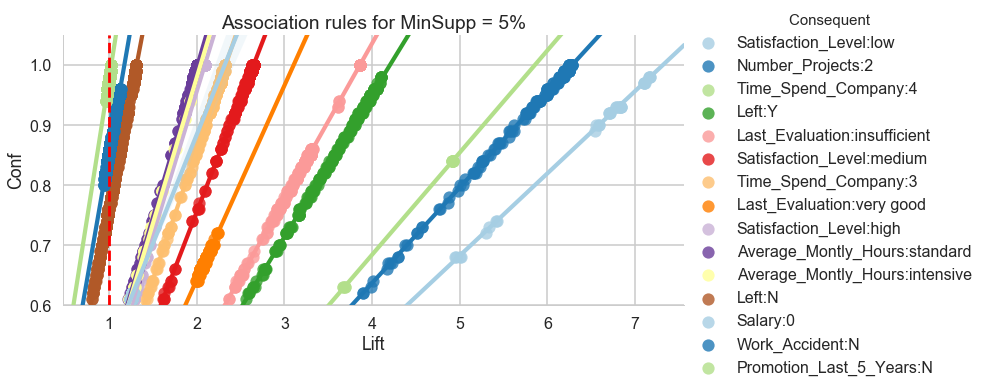

In [41]:
sns.set_style('whitegrid')

size= 2000*(df_filtered.Supp)**(1)

sns.set_palette("Paired")

left_plot = sns.lmplot(x='Lift',y='Conf',data=df_plot,hue='Cons_label',fit_reg=True,
                       aspect=(20/10), scatter_kws={"s": 150},
                       legend_out=True,palette='Paired')

left_plot._legend.set_title("Consequent ")

plt.ylim(0.45,1.05)
plt.ylim(0.6,1.05)
#plt.xlim(0.5,8.1)

plt.axvline(1,color='r',linestyle="--")

sns.set_palette("Paired")
plt.title("Association rules for MinSupp = 5%")


left_plot.savefig("../../images/rules/left_scatter.pdf")
#plt.scatter(x='Conf', y='Lift',data=df_filtered,s=size, alpha=0.7 ,c='Consequent',cmap =plt.cm.get_cmap('Accent',3))




In [216]:
?sns.lmplot()

In [288]:
df_plot.query("Conf>0.99").describe()
df_plot.head(100)

           Consequent                                  Antecedent  Supp  Conf  \
264   insufficient_LE                   ('low_SL', 'N_WA', 'N_P')  0.12  1.00   
267   insufficient_LE                          ('low_SL', 'N_WA')  0.12  1.00   
270   insufficient_LE                           ('low_SL', 'N_P')  0.14  1.00   
272   insufficient_LE                                 ('low_SL',)  0.14  1.00   
501         medium_SL     ('sufficient_LE', 'N_L', 'N_WA', 'N_P')  0.11  1.00   
504         medium_SL            ('sufficient_LE', 'N_L', 'N_WA')  0.11  1.00   
507         medium_SL             ('sufficient_LE', 'N_L', 'N_P')  0.13  1.00   
509         medium_SL                    ('sufficient_LE', 'N_L')  0.13  1.00   
512         medium_SL            ('sufficient_LE', 'N_WA', 'N_P')  0.12  1.00   
514         medium_SL                   ('sufficient_LE', 'N_WA')  0.13  1.00   
516         medium_SL                    ('sufficient_LE', 'N_P')  0.15  1.00   
517         medium_SL       

In [204]:
df_interesting = df_filtered.query(" Lift >5")
df_interesting = df_interesting.query(" Conf >0.95")
df_interesting = df_interesting.sort_values(by=['Consequent','Lift','Supp'],ascending=False)
df_interesting
#((df_interesting.Antecedent[665]))

     Consequent                                         Antecedent  Supp  \
122      low_SL           ('4_T', 'Y_L', 'insufficient_LE', 'N_P')  0.05   
126      low_SL                  ('4_T', 'Y_L', 'insufficient_LE')  0.05   
112      low_SL   ('4_T', 'Y_L', 'insufficient_LE', 'N_WA', 'N_P')  0.05   
117      low_SL          ('4_T', 'Y_L', 'insufficient_LE', 'N_WA')  0.05   
151      low_SL          ('4_T', 'insufficient_LE', 'intensive_H')  0.05   
147      low_SL   ('4_T', 'insufficient_LE', 'intensive_H', 'N_P')  0.05   
187      low_SL   ('Y_L', 'insufficient_LE', 'intensive_H', 'N_P')  0.05   
191      low_SL          ('Y_L', 'insufficient_LE', 'intensive_H')  0.05   
665        2_NP  ('Y_L', 'insufficient_LE', 'medium_SL', '3_T',...  0.09   
671        2_NP  ('Y_L', 'insufficient_LE', 'medium_SL', '3_T',...  0.09   
651        2_NP  ('Y_L', 'insufficient_LE', 'medium_SL', '3_T',...  0.08   
658        2_NP  ('Y_L', 'insufficient_LE', 'medium_SL', '3_T',...  0.08   
592        2

In [18]:
import sys
stdout= sys.stdout
sys.stdout = open('../../data/rules/rules_supp5.txt','w')
print( df_interesting.to_latex(index=False) )
sys.stdout=stdout

##?df.to_latex()



In [19]:
# Analisi regole Per LEFT

In [276]:
df_left = df_filtered.query(" Consequent=='Y_L'")
df_left = df_left.query("Conf >0.5 and Lift>2")
df_left = df_left.sort_values(by=['Consequent','Conf','Supp'],ascending=False)
df_left.describe()
df_left.head(100)
#df_left.Antecedent.iloc[1]


     Consequent                                         Antecedent  Supp  \
591         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.05   
599         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.05   
607         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.05   
614         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.05   
622         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.05   
629         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.05   
650         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.08   
636         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.05   
642         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.05   
664         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.09   
670         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.09   
689         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.09   
694         

In [25]:
df_left.Lift/df_left.Conf

591     4.183673
599     4.183673
607     4.183673
614     4.183673
622     4.183673
629     4.183673
636     4.216495
642     4.216495
650     4.185567
664     4.218750
657     4.218750
677     4.218750
683     4.218750
798     4.218750
805     4.218750
670     4.208333
812     4.208333
818     4.208333
689     4.187500
694     4.187500
702     4.187500
709     4.187500
825     4.187500
831     4.187500
716     4.221053
722     4.221053
849     4.210526
855     4.210526
837     4.210526
842     4.210526
          ...   
2739    4.183333
2726    4.183333
186     4.183333
204     4.183333
2661    4.237288
2741    4.220339
2729    4.220339
190     4.220339
206     4.220339
2664    4.186441
2775    4.169492
2780    4.169492
2708    4.169492
2710    4.224138
77      4.210526
78      4.175439
2667    4.214286
2669    4.160714
2785    4.200000
2789    4.200000
2712    4.200000
2713    4.181818
2829    4.226415
2834    4.207547
195     4.173077
209     4.173077
198     4.235294
211     4.2352

In [321]:
import sys
stdout= sys.stdout
sys.stdout = open('../../data/rules/rules_left.txt','w')
print( df_left.to_latex(index=False) )
sys.stdout=stdout

##?df.to_latex()



In [308]:
df_left.head()

    Consequent                                         Antecedent  Supp  Conf  \
591        Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.05  0.98   
599        Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.05  0.98   
607        Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.05  0.98   
614        Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.05  0.98   
622        Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.05  0.98   

     Lift  
591   4.1  
599   4.1  
607   4.1  
614   4.1  
622   4.1  

# Conversione DataFrame

In [270]:
variables = ['Time_Spend_Company',
            'Department',
            'Number_Projects',
            'Promotion_Last_5_Years',
            'Left',
            'Average_Montly_Hours',
            'Work_Accident',
            'Last_Evaluation',
            'Salary',
            'Satisfaction_Level']

other_columns = ['Antecedent','Consequent','Supp','Conf','Lift']

from copy import copy
columns = copy(variables)

for col in other_columns:
    columns.append(col)


In [19]:
var_dict = {
    'T':'Time_Spend_Company',
    'D':'Department',
    'NP':'Number_Projects',
    'P':'Promotion_Last_5_Years',
    'L':'Left',
    'H':'Average_Montly_Hours',
    'WA':'Work_Accident',
    'LE':'Last_Evaluation',
    'S':'Salary',
    'SL':'Satisfaction_Level'
}

def item2dict(item):
    ## splitto la stringa
    item_split = item.split('_')
    # definisco la lista variabile,valore
    item_list = {var_dict[item_split[1]] : item_split[0]}
    return item_list



item=df.Consequent[10]
item2dict(item)


{'Satisfaction_Level': 'low'}

In [20]:
item_dict = item2dict(item)
def dict2str(item_dict):
    for key in item_dict:
        item_str= "{}:{}".format(key,item_dict[key])
    return item_str

dict2str(item_dict)


'Satisfaction_Level:low'

In [21]:
# funzione che converte la parte antecedent in lista di dizionari

from ast import literal_eval

def antecedent2list(antecedent_str):
    antecedent_tuple = literal_eval(antecedent_str)

    out_list = []
    for item in antecedent_tuple:
        out_list.append(item2dict(item=item))
        
    return out_list


def antecedent2dict(antecedent_str):
    """converte la singola parte antecedente 
    in dizionario """

    antecedent_tuple = literal_eval(antecedent_str)

    out_list = {}
    for item in antecedent_tuple:
        out_list.update(item2dict(item=item))
        
    return out_list


#esempio
out= antecedent2list(df.Antecedent[45])
out2 = antecedent2dict(df.Antecedent[45])

df.Antecedent[45]

out2.keys()
out2


{'Department': '3', 'Left': 'N'}

In [311]:
def df2df_list(df):
    """funzione che converte 
    le stringhe relative alle regole in 
    liste di dizionari """

    df_new = df.copy()

    df_new = df_new.drop(['Antecedent','Consequent'],axis=1)

    Antecedent=[]
    for i,item in enumerate(df.Antecedent):
        Antecedent.append(antecedent2list(item))

    df_new=df_new.assign(Antecedent=Antecedent)

    Consequent=[]
    for i,item in enumerate(df.Consequent):
        Consequent.append(item2dict(item))

    df_new=df_new.assign(Consequent=Consequent)
        
    return df_new        


def df2df_dict(df):
    """funzione che converte 
    le stringhe relative alle regole in 
    liste di dizionari """

    df_new = df.copy()

    df_new = df_new.drop(['Antecedent','Consequent'],axis=1)

    Antecedent=[]
    for i,item in enumerate(df.Antecedent):
        Antecedent.append(antecedent2dict(item))

    df_new=df_new.assign(Antecedent=Antecedent)

    Consequent=[]
    for i,item in enumerate(df.Consequent):
        Consequent.append(item2dict(item))

    df_new=df_new.assign(Consequent=Consequent)
        
    return df_new        



# Analisi in frequenza delle regole per LEFT

In [312]:
df_left

     Consequent                                         Antecedent  Supp  \
591         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.05   
599         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.05   
607         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.05   
614         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.05   
622         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.05   
629         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.05   
636         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.05   
642         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.05   
650         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.08   
664         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.09   
657         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.08   
677         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', '3_T'...  0.08   
683         

In [313]:
# converto in dizionario 
df_left_dict = df2df_dict(df_left)
df_left_dict.head()

     Supp  Conf  Lift                                         Antecedent  \
591  0.05  0.98   4.1  {u'Salary': u'0', u'Satisfaction_Level': u'med...   
599  0.05  0.98   4.1  {u'Salary': u'0', u'Satisfaction_Level': u'med...   
607  0.05  0.98   4.1  {u'Salary': u'0', u'Satisfaction_Level': u'med...   
614  0.05  0.98   4.1  {u'Salary': u'0', u'Satisfaction_Level': u'med...   
622  0.05  0.98   4.1  {u'Salary': u'0', u'Satisfaction_Level': u'med...   

          Consequent  
591  {u'Left': u'Y'}  
599  {u'Left': u'Y'}  
607  {u'Left': u'Y'}  
614  {u'Left': u'Y'}  
622  {u'Left': u'Y'}  

In [314]:
dict_values = extract_values(df_left_dict)
dict_values.keys()


['Salary',
 'Satisfaction_Level',
 'Last_Evaluation',
 'Work_Accident',
 'Number_Projects',
 'Department',
 'Average_Montly_Hours',
 'Promotion_Last_5_Years',
 'Time_Spend_Company',
 'Left']

In [315]:

lista_items=[]
lista_counts=[]

for variable in dict_values.keys():

    print(variable)
    #lista valori associata alla variabile
    lista_values = (dict_values[variable])
    #print(lista_values)

    if (len(lista_values)==0):
        break
    
    # estraggo i valori unici:n
    uniques = [lista_values[0]] #inizializzo col primo valore
    for value in lista_values:
        if(value not in uniques):
            uniques.append(value)
    # conto i valori per ciascun item unico
    uniques_counts=[]
    for i,unique in enumerate(uniques):
        uniques_counts.append(0)
        for value in lista_values:
            if (value ==unique) :
                uniques_counts[i]+=1

    # definisco gli items e li aggiungo alla lista complessiva
    for unique in uniques:
        lista_items.append("{} : {}".format(variable,unique))

    # aggiungo i counts alla lista complessiva    
    lista_counts=lista_counts+uniques_counts

#uniques_counts
#uniques
lista_items
lista_counts

Salary
Satisfaction_Level
Last_Evaluation
Work_Accident
Number_Projects
Department


[49, 55, 65, 45, 73]

In [316]:
lista_items

['Salary : 0',
 'Satisfaction_Level : medium',
 'Last_Evaluation : insufficient',
 'Work_Accident : N',
 'Number_Projects : 2']

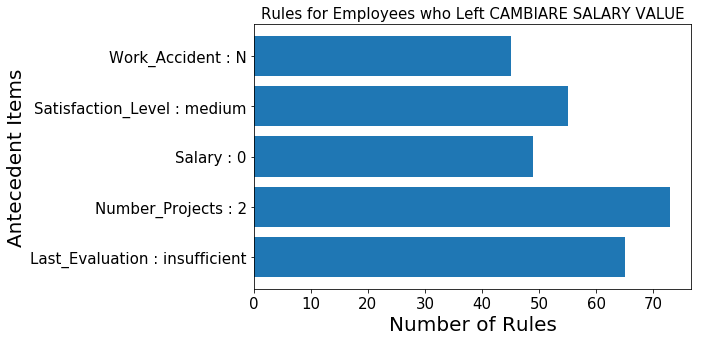

In [320]:
fig = plt.figure(figsize=(10,5))

x=lista_items
y= lista_counts
#y=np.array(lista_counts)/max(np.array(lista_counts))
plt.barh(x,y)
plt.ylabel('Antecedent Items')
plt.xlabel('Number of Rules')
plt.title('Rules for Employees who Left CAMBIARE SALARY VALUE')
plt.tight_layout()
plt.savefig("../../images/rules/rules_left.pdf")

In [300]:
prova= np.array(lista_counts)/max(np.array(lista_counts))
#max(prova)
prova

array([0, 0, 1, 0, 1])